# CMIP6 Access

### Objective
The objective of this notepad is to download and manipulate the ESM1 temperature data from the historic simulation from the CMIP6 data set.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

#imports for pandas
import fsspec
import zarr

#imports for intake
import warnings 
warnings.filterwarnings("ignore")
import intake

## Data Access via Pandas
Accessing the data by use of the google API CMIP6 look up table with use of pandas.

### Loading data set table

In [2]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')

### Searching data sets

In [3]:
dfFilt = df[df.variable_id.eq('thetao') & df.experiment_id.eq('historical') & df.source_id.eq('E3SM-1-0')]
print(str(len(dfFilt))+" datasets found.")

dfFilt2 = df[df.institution_id.eq('NCAR') & df.activity_id.eq('CMIP') 
             & df.table_id.eq('Amon') & df.variable_id.eq('tas') & df.experiment_id.eq('historical')]
dfFilt

5 datasets found.


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
270787,CMIP,E3SM-Project,E3SM-1-0,historical,r1i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP6/CMIP/E3SM-Project/E3SM-1-0/hi...,NaN,20190826
271418,CMIP,E3SM-Project,E3SM-1-0,historical,r2i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP6/CMIP/E3SM-Project/E3SM-1-0/hi...,NaN,20190830
401215,CMIP,E3SM-Project,E3SM-1-0,historical,r4i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP6/CMIP/E3SM-Project/E3SM-1-0/hi...,NaN,20200129
401216,CMIP,E3SM-Project,E3SM-1-0,historical,r3i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP6/CMIP/E3SM-Project/E3SM-1-0/hi...,NaN,20200129
430471,CMIP,E3SM-Project,E3SM-1-0,historical,r5i1p1f1,Omon,thetao,gr,gs://cmip6/CMIP6/CMIP/E3SM-Project/E3SM-1-0/hi...,NaN,20200429


### Opening of data file

In [4]:
zstore = dfFilt2.zstore.values[0]
mapper = fsspec.get_mapper(zstore)
fileRaw = xr.open_zarr(mapper, consolidated=True)
fileRaw

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  25185.0
    case_id:                6
    ...                     ...
    variable_id:            tas
    variant_info:           CMIP6 CESM2 hindcast (1850-2015) with high-top at...
    variant_label:          r3i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/e0b9ce1e-c5c4-45c3-bc34-7b81f6e528e2
    version_id:             v20190227

### Data display

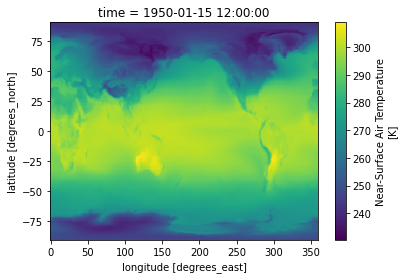

In [5]:
dataRaw = fileRaw.tas #Modify to reflect variable ID
dataRaw.sel(time='1950-01').squeeze().plot()

### Area weighting factor

In [6]:
dfArea = df[df.variable_id.eq('areacella') & df.source_id.eq('CESM2')]
dsArea = xr.open_zarr(fsspec.get_mapper(dfArea.zstore.values[0]), consolidated=True)
dsArea

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          no parent
    branch_time_in_child:   711385.0
    branch_time_in_parent:  0.0
    case_id:                38
    ...                     ...
    variable_id:            areacella
    variant_info:           f.e21.FHIST_BGC.f09_f09_mg17.CMIP6-AMIP.001 
\n
\...
    variant_label:          r1i1p1f1
    status:                 2019-11-04;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/23fa9dc3-4f8f-4943-b99b-58eb804c06f0
    version_id:             v20190218

In [7]:
totalArea = dsArea.areacella.sum(dim=['lon', 'lat'])
taTimeSeries = (dataRaw*dsArea.areacella).sum(dim=['lon', 'lat']) / totalArea
taTimeSeries

<xarray.DataArray (time: 1980)>
dask.array<truediv, shape=(1980,), dtype=float32, chunksize=(600,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

In [8]:
%time taTimeSeries.load()

Wall time: 7.94 s


<xarray.DataArray (time: 1980)>
array([284.89963, 285.08063, 285.55655, ..., 288.34634, 287.6107 ,
       286.86273], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

Text(0.5, 1.0, 'Global Mean Surface Air Temperature')

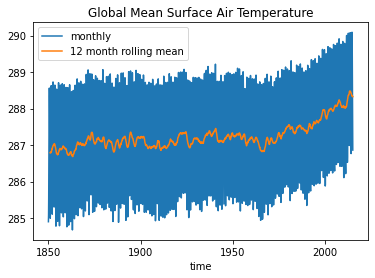

In [9]:
taTimeSeries.plot(label='monthly')
taTimeSeries.rolling(time=12).mean().plot(label='12 month rolling mean')
plt.legend()
plt.title('Global Mean Surface Air Temperature')

## Data Access via intake
The project data can also be accessed using the intake feature.

### Opening datastore

In [10]:
url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(url)
col

,unique
activity_id,17
institution_id,36
source_id,86
experiment_id,168
member_id,650
table_id,37
variable_id,709
grid_label,10
zstore,502742
dcpp_init_year,60


In [11]:
query = dict(
    experiment_id=['abrupt-4xCO2', 'piControl'],
    table_id='Amon',
    variable_id=['tas','rsut','rsdt','rlut'],
    member_id='r1i1p1f1'
)

colSubset = col.search(require_all_on=["source_id"], **query)
colSubset.df.groupby("source_id")[
    ["experiment_id","variable_id","table_id"]
].nunique()

,experiment_id,variable_id,table_id
source_id,,,
ACCESS-CM2,2,4,1
ACCESS-ESM1-5,2,4,1
AWI-CM-1-1-MR,2,4,1
BCC-CSM2-MR,2,4,1
BCC-ESM1,2,4,1
CAMS-CSM1-0,2,4,1
CAS-ESM2-0,2,4,1
CESM2,2,4,1
CESM2-FV2,2,4,1


In [1]:
def drop_all_bounds(ds):
    dropVars = [vname for vname in ds.coords
               if (('_bounds') in vname) or ('_bnds') in vname]
    return ds.drop(dropVars)

def open_dsets(df):
    dsets = [xr.open_zarr(fsspec.get_mapper(dsUrl), consolidated=True)
             .pipe(drop_all_bounds)
             for dsUrl in df.zstore]
    try:
        ds = xr.merge(dsets, join='exact')
        return ds
    except ValueError:
        return None
    
def open_delayed(df):
    return dask.delayed(open_dsets)(df)